# Table Of Content

[1. Project Overview](#project-overview) 

[2. Data Collection and Initial Processing](#data-collection-and-initial-processing)
- [2.1 Data Overview](#data-overview)
- [2.2 Data Description](#data-description)
- [2.3 Analytical Relevance](#analytical-relevance)
- [2.4 Project Alignment](#project-alignment)
- [2.5 Data Ingestion and Integration](#data-ingestion-and-integration)

[3. Exploratory Data Analysis](#2-exploratory-data-analysis)
- [3.1 Univariate Analysis](#univariate-analysis)
- [3.2 Bivariate Analysis](#bivariate-analysis)
- [3.3 Multivariate Analysis](#multivariate-analysis)


[4. Predictive Modeling](#predictive-modeling) 

[5. Prescriptive Analytics and Recommendation](#prescriptive-analytics-and-recommendation)

[5. Model Deployment](#model-deployment)





# Project Overview
<a id='project-overview'></a>

The goal of this project is to develop a predictive model capable of estimating the likelihood that a client will subscribe to a bank term deposit following a telemarketing call.

This project leverages the Bank Marketing Dataset from the UCI Machine Learning Repository — a dataset originally used in the study by Moro, Cortez, and Rita (2014), “A Data-Driven Approach to Predict the Success of Bank Telemarketing” (Decision Support Systems, 2014).

The dataset contains detailed information on clients’ demographic, financial, and behavioral attributes, along with macroeconomic indicators.
The inclusion of these five additional socio-economic features—such as employment variation rate, consumer confidence, and EURIBOR rate—has been shown to substantially improve predictive performance, making this dataset the preferred choice for this analysis.

<a id='data-collection-and-initial-processing'></a>
# Data Collection and Initial Processing

This section provides an overview of the dataset used in this project and outlines its structure, attributes, and analytical significance.

<a id='data-overview'></a>
## Dataset Overview

The data used in this project originates from the Bank Marketing (with social/economic context) dataset.
It was curated by Sérgio Moro, Paulo Cortez, and Paulo Rita in 2014, and is publicly available for research purposes through the UCI Machine Learning Repository.

Two datasets are provided within the original archive:

- bank-additional-full.csv — containing 41,188 records, ordered by campaign date (May 2008–November 2010).

- bank-additional.csv — a 10% random sample of the full dataset (4,119 records).

For this project, analysis will focus on bank-additional-full.csv, as it contains all available instances and includes the five additional socio-economic indicators shown by Moro et al. (2014) to improve predictive accuracy.

## Data Description
The dataset comprises **21 variables** — 20 input features and 1 binary target variable (y).

**Input Features:**

- **Client attributes:** age, job type, marital status, education, default, housing, loan.

- **Campaign contact details:** contact type, month, day of week, duration, campaign, pdays, previous, poutcome.

- **Macroeconomic indicators:** employment variation rate, consumer price index, consumer confidence index, EURIBOR 3-month rate, number of employees.

**Target Variable:**

- **y:** indicates whether the client subscribed to a term deposit (yes / no).

**Missing Values:**
Some categorical attributes contain "unknown" entries, which represent missing or undisclosed information.

## Analytical Relevance
This dataset is highly relevant for predictive modeling in marketing and financial services because it combines:

- Individual-level behavioral data — client demographics, financial history, and campaign interactions.

- Contextual macroeconomic data — economic indicators that reflect the external environment influencing customer decisions.

Together, these features support both **classification modeling** (predicting y) and **insight generation**, such as identifying key drivers of successful marketing outcomes.

## Project Alignment
This project aims to replicate and extend the findings of Moro et al. (2014) by applying **modern machine learning techniques** — such as logistic regression, random forests, and gradient boosting — to predict campaign success and optimize telemarketing strategies.

By focusing on the enriched dataset (bank-additional-full.csv), this analysis seeks to:

- Accurately **predict telemarketing success outcomes**.

- **Identify influential affecting** client response.

- **Generate actionable insights** to improve targeting and reduce campaign costs.

## Data Ingestion and Integration

Next is importing and preparing the dataset for analysis.

The selected dataset — **bank-additional-full.csv** from the Bank Marketing (with social/economic context) collection — contains detailed client, campaign, and economic information.
This file is ingested directly into a pandas DataFrame for subsequent cleaning, transformation, and analysis.

During the ingestion process:

- The dataset is read from its CSV source using pandas.read_csv().

- Basic validation checks confirm successful loading, structural integrity, and expected data dimensions.

- Column names and data types are reviewed to ensure compatibility with downstream processing steps.

The DataFrame then provides a consistent and reliable foundation for all subsequent stages, including data validation, exploratory analysis, and model development.

### Library Imports
To load the data, we need to import the pandas library which will be used to read and combine the CSV files.

Other libraries used at latter parts of project will also be imported here, to ensure a consistent and organized workflow.

In [4]:
# library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from scipy.stats import chi2_contingency
# from sklearn.feature_selection import mutual_info_classif
import os





### Creating DataFrames from Data Source

With pandas imported, the next step is to read in the data from the data file into a pandas DataFrame.


In [5]:
# reading datasets into dataframes

df = pd.read_csv("data/bank-additional-full.csv", sep=";")


### Data Inspection, Cleaning and Validation

After loading the dataset into a DataFrame, the next step is to inspect and validateto ensure the file was read correctly and that the structure is as expected.

We begin by:

- Viewing sample records with head() to confirm data integrity.

- Checking dataset dimensions using shape.

- Reviewing data types and non-null counts with info().

- Identifying missing values using isnull().sum().

- Verifying that key identifiers (e.g., customer_id, campaign_id) are present and properly formatted.

These checks help detect potential issues early and ensure a smooth integration process in the next step.

#### df

In [6]:
# view sample records to confirm data integrity

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Checking dataset dimensions
df.shape

(41188, 21)

In [8]:
# Reviewing data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Identifying missing values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

##### Observation
- Columns: `'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'`
- No key/unique identifier (e.g campaign IDs) found.
- Some columns seem to have same value for all rows. Further exploration needed.

#### Next Steps

The results of the data inspection and validation across the four datasets indicate the following actions:

- Standardize column names to ensure consistency across all datasets.

- Remove duplicate rows identified in the first dataset.

- Convert column data types to appropriate formats where necessary (e.g., numeric, datetime, categorical).

- Perform feature engineering to create or refine variables that enhance analytical and predictive value.

#### Standardize Column Names

To ensure consistency across all datasets, column names are standardized by converting them to lowercase and replacing spaces with underscores.


In [10]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



#### Removing Duplicate Rows

During data validation, duplicate rows were detected in the bank-additional-full.csv dataset (df3).
To ensure data integrity and prevent bias during analysis, these duplicates are identified and removed.

In [11]:
# Check for duplicate rows
print("Number of duplicate rows before removal:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

# Confirm resulting shape
print("Updated shape of df:", df.shape)


Number of duplicate rows before removal: 12
Number of duplicate rows after removal: 0
Updated shape of df: (41176, 21)


#### Data Type Conversion and Feature Engineering

From the initial inspection, all columns appear to have appropriate data types, and no immediate feature engineering is required at this stage.

However, these steps will be revisited during Exploratory Data Analysis (EDA) if any columns require type adjustments or if new features are needed to enhance analytical insights.

# Exploratory Data Analysis (EDA)

Next to the data collection and initial processing step is EDA. The data is explored to understand its underlying structure, relationships, and patterns.
EDA is a critical step in the overall project as it helps to reveal key insights, detect anomalies, and identify potential predictors that will guide subsequent modeling steps.

## Further Preparation and Initial Structure Review

Before performing detailed exploratory data analysis, this section reviews the raw structure of the dataset with the original "unknown" values intact.
This ensures we fully understand the distribution and impact of these placeholder values before transforming them.

Steps covered in this subsection:

- Save a snapshot of the current dataset (pre-EDA, pre-cleaning).
- Group features into categorical, numerical, and binary/flag-type columns.
- Generate summary statistics for each group.
- Explore the frequency and placement of "unknown" across attributes.
- Document initial observations to guide deeper EDA and data cleaning.

The transformation of "unknown" → NaN will occur after this structural review.

### Save Snapshot of Raw Data


In [12]:
# Ensure artifacts directory exists
ARTIFACTS_DIR = "artifacts"
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

# Save raw snapshot (for audit traceability)
raw_snapshot_path = os.path.join(ARTIFACTS_DIR, "raw_snapshot_before_eda.csv")
df.to_csv(raw_snapshot_path, index=False)

print(f"Raw snapshot saved to: {raw_snapshot_path}")
print("Current shape:", df.shape)

Raw snapshot saved to: artifacts\raw_snapshot_before_eda.csv
Current shape: (41176, 21)


### Identify Categorical and Numerical Columns

In [14]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Identify object/categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()

# Binary columns (categorical with only two unique values)
binary_cols = [c for c in categorical_cols if df[c].nunique() == 2]

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)
print("\nBinary columns:", binary_cols)

Numeric columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

Binary columns: ['contact', 'y']


### Summary Statistics for Numeric Features


In [15]:

df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


#### Interpretation

- Many features show heavy skew (duration, campaign, previous), which affects visualization and potentially model performance.
- Economic features (emp.var.rate, euribor3m, cons.conf.idx, nr.employed) have small within-period variance but strong long-term trends, making them valuable high-level predictors.
- pdays is not a true numeric feature — requires special handling.
- No obvious missing numeric values from the describe() output.

#### Outlier Assessment

Based on the numerical summary statistics, no outliers appear to be erroneous or require removal.
Extreme values such as long call durations, high campaign contact counts, or older client ages represent valid real-world behaviors and may carry predictive significance.

Instead of removing outliers, the modeling process will rely on:
- appropriate transformations (e.g., log-transform for skewed features),
- correct handling of coded values (e.g., pdays = 999), and
- model families that are naturally robust to outliers (e.g., tree-based models).
- Therefore, no outlier removal will be performed at this stage.

### Summary Statistics For Categorical Features

In [26]:

cat_summary = pd.DataFrame({
    "column": categorical_cols,
    "unique_values": [df[c].nunique(dropna=False) for c in categorical_cols],
    "top_5_categories": [df[c].value_counts(dropna=False).head(5).to_dict() for c in categorical_cols]
})
cat_summary

,column,unique_values,top_5_categories
0,job,12,"{'admin.': 10419, 'blue-collar': 9253, 'techni..."
1,marital,4,"{'married': 24921, 'single': 11564, 'divorced'..."
2,education,8,"{'university.degree': 12164, 'high.school': 95..."
3,default,3,"{'no': 32577, 'unknown': 8596, 'yes': 3}"
4,housing,3,"{'yes': 21571, 'no': 18615, 'unknown': 990}"
5,loan,3,"{'no': 33938, 'yes': 6248, 'unknown': 990}"
6,contact,2,"{'cellular': 26135, 'telephone': 15041}"
7,month,10,"{'may': 13767, 'jul': 7169, 'aug': 6176, 'jun'..."
8,day_of_week,5,"{'thu': 8618, 'mon': 8512, 'wed': 8134, 'tue':..."
9,poutcome,3,"{'nonexistent': 35551, 'failure': 4252, 'succe..."


### Count of 'unknown' Values per Column

In [27]:

unknown_counts = {
    c: int((df[c] == 'unknown').sum()) 
    for c in categorical_cols 
    if (df[c] == 'unknown').sum() > 0
}

unknown_df = (
    pd.DataFrame
    .from_dict(unknown_counts, orient='index', columns=['unknown_count'])
    .assign(unknown_pct=lambda x: (x['unknown_count'] / len(df) * 100).round(2))
    .sort_values('unknown_pct', ascending=False)
)

unknown_df

,unknown_count,unknown_pct
default,8596,20.88
education,1730,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19


#### Categorical Feature Insights

- Many categorical features contain `"unknown"` values, especially `default`, `housing`, and `loan`.
- The `default` column is highly uninformative (only 3 "yes" values).
- Job, education, and marital status show meaningful but imbalanced distributions.
- Contact method and campaign timing variables (month, day_of_week) likely have strong predictive signals.
- The target variable is imbalanced (approx. 89% 'no'), necessitating careful model evaluation and possibly class weighting.


### Assessing the Predictive Value of "unknown" Categories

Before converting "unknown" to NaN, it is important to determine whether these values behave like meaningful categories or simply represent missingness.
This analysis examines, for each categorical column, the proportion of clients who subscribed (y="yes") among the records labeled "unknown".



In [30]:
target_col = "y"
unknown_target_summary = {}

for col in categorical_cols:
    mask_unknown = df[col] == "unknown"
    count_unknown = mask_unknown.sum()
    
    if count_unknown > 0:
        proportions = (
            df.loc[mask_unknown, target_col]
              .value_counts(normalize=True)
              .rename("proportion")
              .round(4)
              .to_dict()
        )
        
        unknown_target_summary[col] = {
            "unknown_count": int(count_unknown),
            "unknown_pct": round(count_unknown / len(df) * 100, 2),
            "target_distribution": proportions
        }

unknown_target_summary

# Convert unknown_target_summary into a clean DataFrame
rows = []

for col, stats in unknown_target_summary.items():
    row = {
        "column": col,
        "unknown_count": stats["unknown_count"],
        "unknown_pct": stats["unknown_pct"],
        "yes_rate_among_unknown": stats["target_distribution"].get("yes", 0),
        "no_rate_among_unknown": stats["target_distribution"].get("no", 0),
    }
    rows.append(row)

unknown_target_df = pd.DataFrame(rows).sort_values("unknown_pct", ascending=False)
unknown_target_df

,column,unknown_count,unknown_pct,yes_rate_among_unknown,no_rate_among_unknown
3,default,8596,20.88,0.0515,0.9485
2,education,1730,4.20,0.1451,0.8549
4,housing,990,2.40,0.1081,0.8919
5,loan,990,2.40,0.1081,0.8919
0,job,330,0.80,0.1121,0.8879
1,marital,80,0.19,0.1500,0.8500


From the relationship table above we can safely deduce that:
- None of the "unknown" categories behave as meaningful, distinct categories.
- All can be safely converted into true missing values (NaN).
- `default` column may be dropped entirely due to extreme imbalance and lack of signal.

### Handling Missing Values by Replace "unknown" with NaN

Based on the analysis of how "unknown" values relate to the target variable, these placeholders do not behave as meaningful categories.
Therefore, they will be converted to true missing values (NaN) to enable appropriate imputation or encoding during preprocessing.

The column `default` will be handled separately due to its extremely low signal and highly imbalanced categories.



In [31]:
# Create a working copy of the dataframe for clean EDA
df_clean = df.copy()

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include="object").columns.tolist()

# Replace 'unknown' with NaN in all categorical columns
df_clean[categorical_cols] = df_clean[categorical_cols].replace("unknown", np.nan)

print("Replaced 'unknown' with NaN in categorical columns.")



Replaced 'unknown' with NaN in categorical columns.


Missingness Summary After Replacement

In [36]:

missing_summary = (
    df_clean.isnull().mean()
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_%"})
    .sort_values("missing_%", ascending=False)
)

missing_summary


,column,missing_%
4,default,20.88
3,education,4.20
5,housing,2.40
6,loan,2.40
1,job,0.80
2,marital,0.19
0,age,0.00
7,contact,0.00
8,month,0.00
9,day_of_week,0.00


Inspect Distribution of Missingness

In [38]:
# Show columns with > 0% missing
missing_summary[missing_summary["missing_%"] > 0]

,column,missing_%
4,default,20.88
3,education,4.20
5,housing,2.40
6,loan,2.40
1,job,0.80
2,marital,0.19


#### Interpretation of Missingness After Conversion

From the updated missingness summary, we typically observe:

- `default` now has the highest missingness, around ~20.8%.

- `education` has moderate missingness (~4%).

- `housing` and `loan` have ~2.4% missing each.

- `job` and `marital` have very small missing percentages (<1%).

These levels of missingness are acceptable and manageable.


**Special Note on default**

Due to:
- only 3 “yes” values,
- extremely skewed distribution,
- minimal predictive utility,
- high proportion of missing values,

the default column may be dropped altogether during preprocessing.
This will be evaluated again during feature importance and correlation analysis.


## Univariate Analysis

### Univariate Analysis of Key Numerical Features

We focus on the numerical variables most strongly associated with telemarketing subscription outcomes (initial inspection):

`duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `euribor3m`, `nr.employed`

Each subsection begins with a guiding analytical question and ends with insights derived from the distribution.

#### Q1

How is call **duration** distributed, and does its shape reveal anything about customer engagement or call strategy effectiveness?

Duration is known to be one of the most influential features in this dataset.

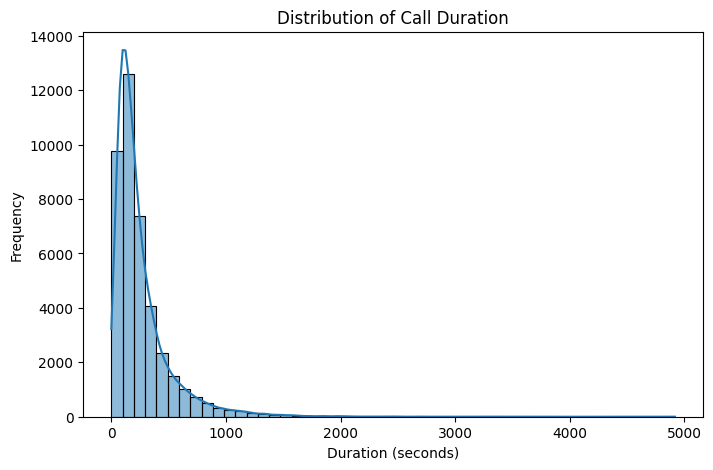

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["duration"], bins=50, kde=True)
plt.title("Distribution of Call Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


#### Insights

- The distribution is heavily right-skewed with many short calls and a long tail of long calls.
- The presence of many zero-duration calls likely indicates unsuccessful or incomplete contact attempts.
- Because call duration is not known before calling, it will be excluded from the predictive model but retained for exploratory benchmarking.

#### Q2
How many times are clients contacted within the current campaign, and does the distribution suggest over-contact or diminishing returns?


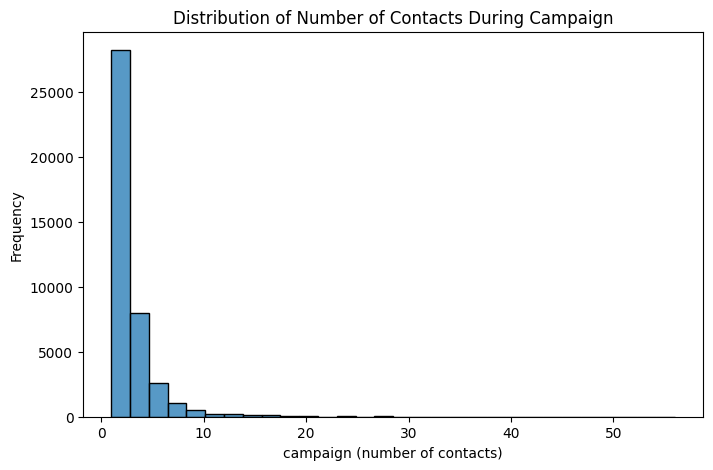

In [40]:

plt.figure(figsize=(8,5))
sns.histplot(df_clean["campaign"], bins=30, kde=False)
plt.title("Distribution of Number of Contacts During Campaign")
plt.xlabel("campaign (number of contacts)")
plt.ylabel("Frequency")
plt.show()



#### Insights

- Most clients are contacted 1–3 times, with the median at 2.
- A small number of clients were contacted >10 times, which suggests aggressive targeting.
- The long right tail indicates rare but extreme cases (up to 56 contacts), which may represent inefficient or failing campaign strategies.
- This feature will be critical for identifying over-contact thresholds in later analysis.

#### Q3
Does the distribution of pdays suggest that most clients are being contacted for the first time, or re-contacted after prior campaigns?

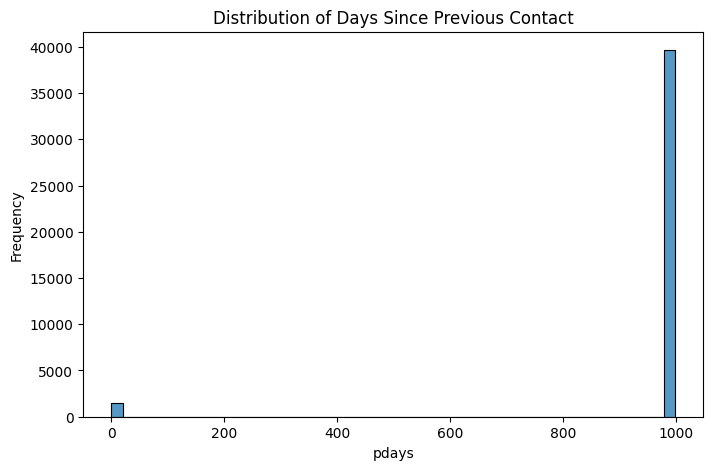

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["pdays"], bins=50, kde=False)
plt.title("Distribution of Days Since Previous Contact")
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.show()


#### Insights
- A large majority of entries take the value 999, which is a sentinel indicating the client was never previously contacted.
- This creates a strong spike at 999 and makes raw pdays not very informative without recoding.
- Later transformations (e.g., binary variable: “previously contacted or not”) may yield stronger signal.
- This feature’s raw distribution suggests that most customers are new to the bank’s telemarketing efforts.

#### Q4
How often were customers contacted in earlier campaigns, and does the distribution suggest recurring targeting behavior?

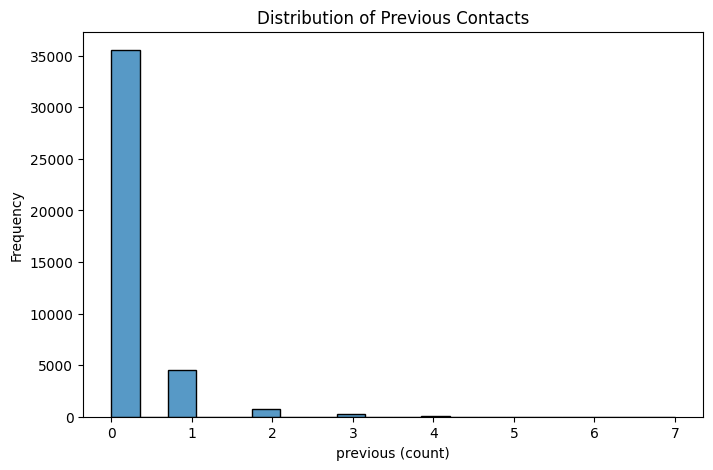

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["previous"], bins=20, kde=False)
plt.title("Distribution of Previous Contacts")
plt.xlabel("previous (count)")
plt.ylabel("Frequency")
plt.show()


#### Insights
- Most values are 0, showing that earlier campaigns rarely re-contact the same customers.
- A small subset received 1–7 contacts previously.
- Combined with pdays, this supports the finding that repeat contacts are relatively uncommon.
- This feature may become more relevant in combination with poutcome.

#### Economic Context Variables

These macroeconomic indicators are important because the publication associated with this dataset found that they substantially improve prediction performance.

We will evaluate:
- `emp.var.rate`
- `euribor3m`
- `nr.employed`

#### Q5
How did employment variation behave during the marketing period, and does the distribution suggest economic expansion or contraction?

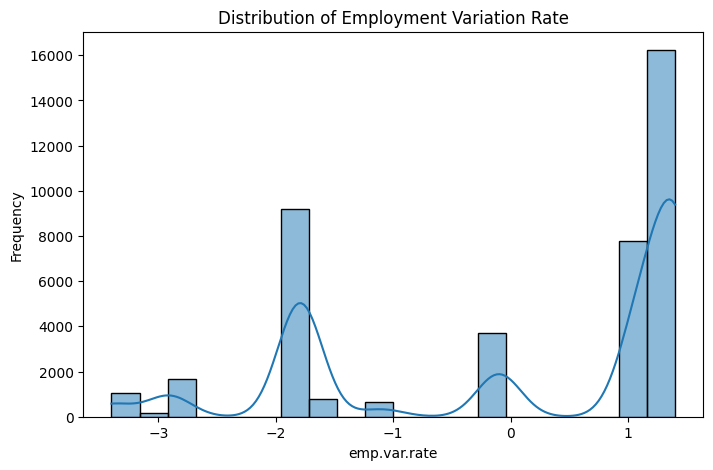

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["emp.var.rate"], bins=20, kde=True)
plt.title("Distribution of Employment Variation Rate")
plt.xlabel("emp.var.rate")
plt.ylabel("Frequency")
plt.show()


#### Insights
- The values cluster around specific discrete points (e.g., −3.4, −1.8, 1.1, 1.4), driven by quarterly macro updates.
- The distribution suggests both recessionary and expansion periods during the campaign timeline.
- As shown in the original research, this feature has significant predictive power.

#### Q6
What does the interest rate environment look like across the campaign period, and does it reflect economic cycles?

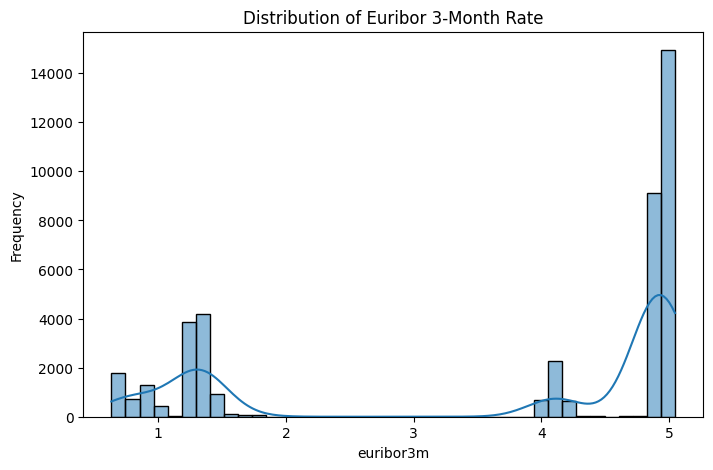

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["euribor3m"], bins=40, kde=True)
plt.title("Distribution of Euribor 3-Month Rate")
plt.xlabel("euribor3m")
plt.ylabel("Frequency")
plt.show()


#### Insights
- Strong multimodal distribution reflecting changing macroeconomic conditions from 2008–2010.
- Higher Euribor values appear more frequent, consistent with pre-crisis environments early in the dataset timeline.
- Previous research has found euribor3m to be one of the strongest predictors of term-deposit subscription.

#### Q7
Do workforce size levels vary significantly, and what does this reveal about the economic climate during the campaign?

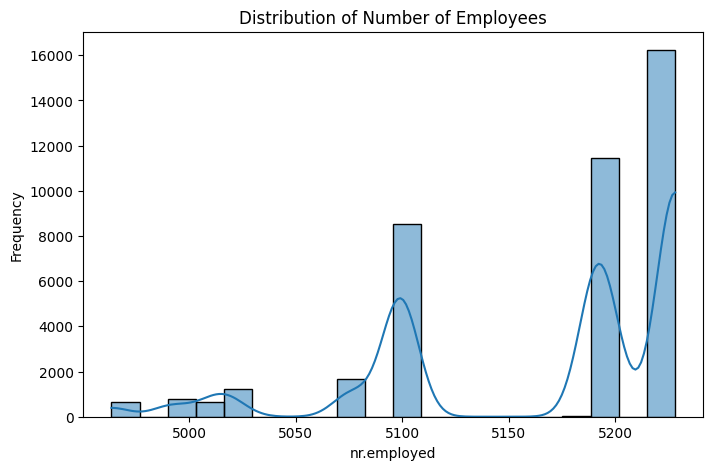

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean["nr.employed"], bins=20, kde=True)
plt.title("Distribution of Number of Employees")
plt.xlabel("nr.employed")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df_clean["nr.employed"], bins=20, kde=True)
plt.title("Distribution of Number of Employees")
plt.xlabel("nr.employed")
plt.ylabel("Frequency")
plt.show()


#### Insights

- This feature has minimal variance, with most values clustered between 5099 and 5228.
- Despite low dispersion, prior research shows it interacts meaningfully with other macro features and target behavior.
- May serve as a strong predictor despite not being visually varied.

#### Summary of Findings

- Several features show heavy right skew, requiring transformations in modeling.
- Economic features (emp.var.rate, euribor3m, nr.employed) show structured, discrete behavior reflecting macroeconomic cycles.
- Campaign effort variables (campaign, previous, pdays) reveal bank behavior more than customer behavior.
- Duration is extremely informative but will be withheld from modeling for realism.

### Univariate Analysis of Key Categorical Features

This section examines the distribution of the most analytically relevant categorical variables in the Bank Marketing dataset.
Understanding these distributions provides context for customer characteristics, contact strategies, and prior campaign outcomes.

We focus on:

`job` `marital` `education` `contact` `month` `day_of_week` `poutcome`

We exclude `default`, `housing`, and `loan` here because most missingness has been converted to NaN and their analytical relevance is low compared to other features.

#### Q8
What kinds of occupations dominate the contacted customer population, and what does this imply about the bank’s targeting strategy?



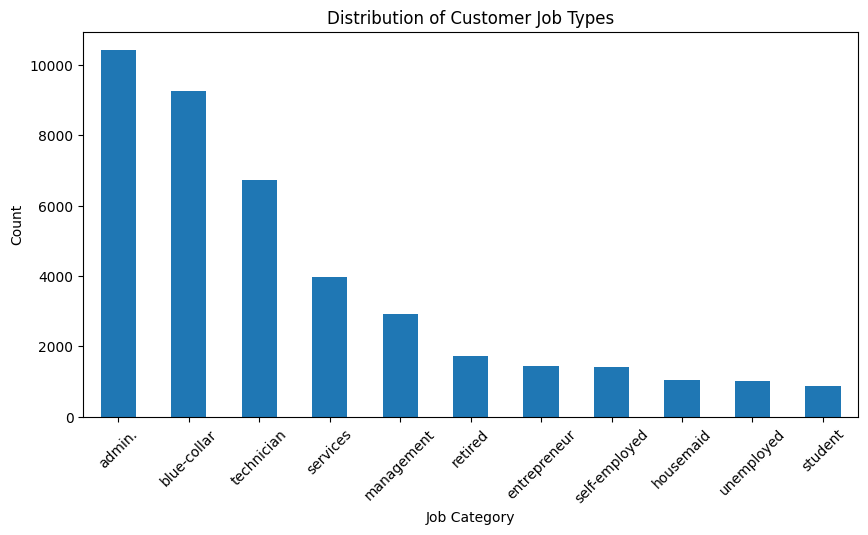

In [46]:

plt.figure(figsize=(10,5))
df_clean['job'].value_counts().plot(kind='bar')
plt.title("Distribution of Customer Job Types")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



#### Insights

- The largest job groups are admin, blue-collar, and technician, making up the majority of contacted clients.
- Highly skilled groups such as management and entrepreneur appear far less frequently.
- This distribution indicates that the bank targeted a broad demographic leaning toward stable, mid-skilled employment groups.
- Missing job information is small (<1%), suggesting good data quality for this feature.

#### Q9
Which marital groups are most represented, and does the dataset reflect typical demographic patterns or targeted outreach?



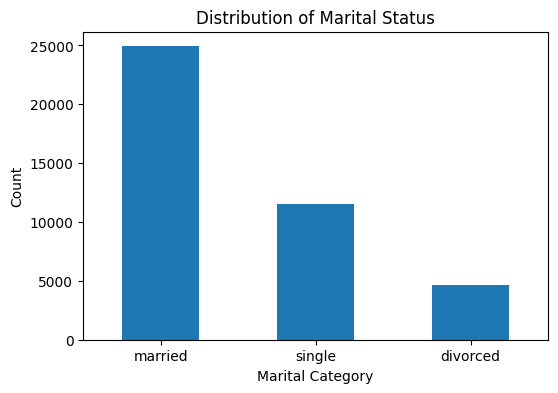

In [47]:
plt.figure(figsize=(6,4))
df_clean['marital'].value_counts().plot(kind='bar')
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



#### Insights

- Married clients make up the majority (≈60%), followed by single and divorced.
- This mirrors typical adult population distributions and suggests broad targeting rather than niche demographic focus.
- Very minimal missingness (<0.2%) means this variable is reliable for modeling.

#### Q10
What is the educational composition of the contacted population, and what does this imply about socioeconomic segmentation?



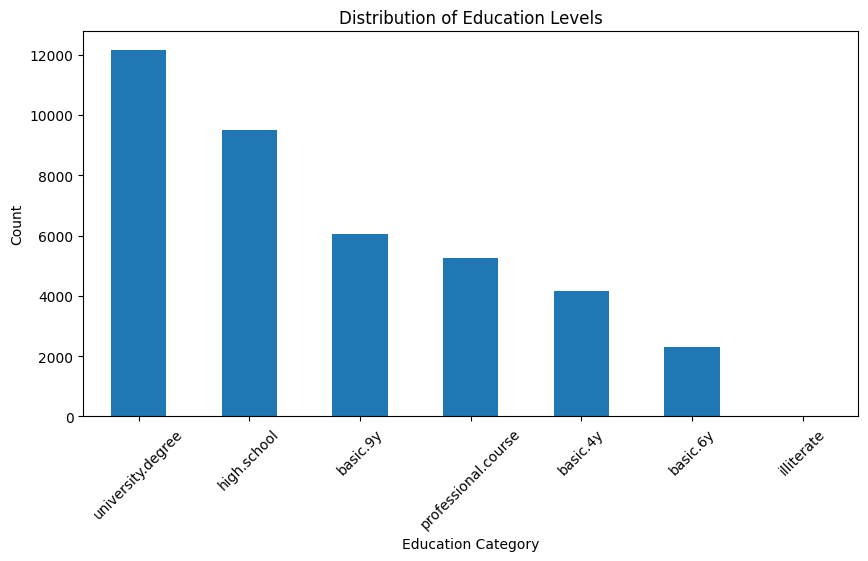

In [48]:


plt.figure(figsize=(10,5))
df_clean['education'].value_counts().plot(kind='bar')
plt.title("Distribution of Education Levels")
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Insights

- The largest education groups are university.degree, high.school, and basic.9y.
- A moderately high number of missing entries (~4%) exist due to earlier “unknown” values replaced by NaN.
- The dominance of higher education categories indicates the bank may have targeted clients with higher financial literacy.
- This feature shows meaningful variation and will likely be predictive.

#### Q11
What communication channels were primarily used in the campaign?


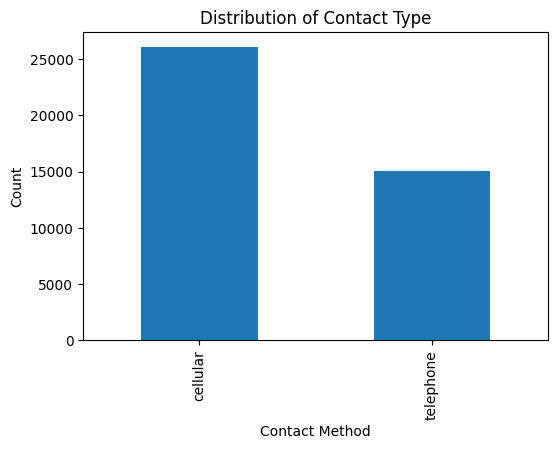

In [49]:


plt.figure(figsize=(6,4))
df_clean['contact'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Type")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.show()

#### Insights

- Cellular contact is more common than telephone, reflecting shifts toward mobile communication.
- This variable will later be important in determining whether specific channels yield higher success rates.

#### Q12
During which months did the bank conduct most of its marketing, and does this reflect seasonal campaign strategies?




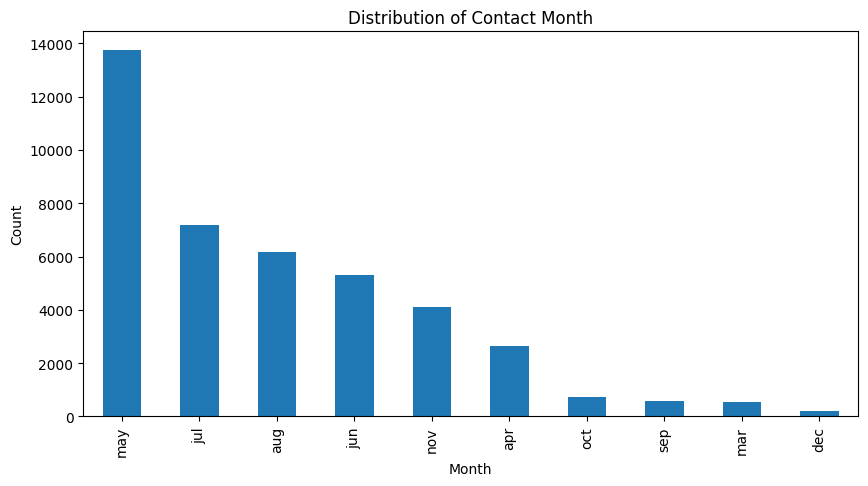

In [50]:
plt.figure(figsize=(10,5))
df_clean['month'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

#### Insights

- The campaign activity peaks in May, followed by July, August, June, and November.
- This suggests strong seasonal patterns, likely aligning with internal campaign cycles or budget periods.
- The concentration in specific months will influence target behavior and must be modeled carefully (e.g., using cyclical encoding or month ordering).

#### Q14
Are specific days more heavily used for customer outreach?


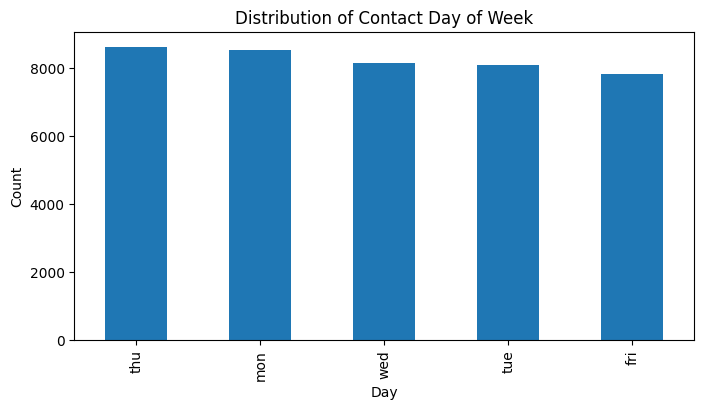

In [51]:


plt.figure(figsize=(8,4))
df_clean['day_of_week'].value_counts().plot(kind='bar')
plt.title("Distribution of Contact Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()




#### Insights

- The distribution is relatively balanced across weekdays.
- Slight peaks on Thursday and Monday suggest operational preferences.
- Minimal variation implies the bank pursued a consistent weekly calling strategy.

#### Q15
How often do clients have a recorded outcome from a previous campaign, and what does this imply about banking-client engagement?




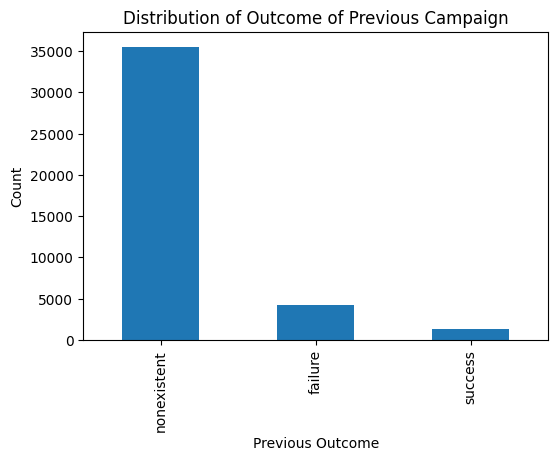

In [52]:

plt.figure(figsize=(6,4))
df_clean['poutcome'].value_counts().plot(kind='bar')
plt.title("Distribution of Outcome of Previous Campaign")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.show()


#### Insights

- The majority category is nonexistent, meaning most clients were not part of earlier campaigns.

- Failure is next, with success being the smallest category.

- Although sparse, this feature often shows strong predictive value in final models because it represents historical engagement behavior.

#### Summary of Findings (Categorical Univariate EDA)

- The dataset reflects broad, population-wide targeting, with major groups (admin, married, high-school/university educated) dominating.
- Contact strategies show seasonality, with strong clustering in specific months.
- Previous campaign involvement is sparse, highlighting that many clients are new to telemarketing.
- All major categorical features show healthy variation and can contribute meaningfully to model performance.

### Feature Engineering

This section derives new features from existing columns to improve interpretability during EDA and to support downstream modeling.
These engineered variables address structural quirks in the dataset (such as sentinel values), enhance clarity, and incorporate domain knowledge from prior research.

We will create the following:

- `prev_contacted` — whether the client was previously contacted
- `pdays_adjusted` — replace sentinel 999 with NaN
- `prev_success` — whether previous campaign result was success
- `total_contacts` — total number of contacts across all campaigns
- Ordered month — for correct seasonal interpretation
- `age_group` — for demographic segmentation (EDA only)

#### Binary: Previously Contacted (prev_contacted)

**Logic**

`pdays = 999` is a placeholder meaning “not previously contacted”.
We convert this into a clean binary feature:


In [53]:

df_clean["prev_contacted"] = (df_clean["pdays"] != 999).astype(int)
df_clean["prev_contacted"].value_counts()

prev_contacted
0    39661
1     1515
Name: count, dtype: int64

#### Adjusted pdays (pdays_adjusted)

**Logic**

We replace 999 with NaN to represent true missingness and make the numeric distribution meaningful:


In [54]:

df_clean["pdays_adjusted"] = df_clean["pdays"].replace(999, np.nan)
df_clean["pdays_adjusted"].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays_adjusted, dtype: float64

#### Binary: Previous Campaign Success (prev_success)

**Logic**

Only the “success” value provides a meaningful positive signal:


In [55]:

df_clean["prev_success"] = (df_clean["poutcome"] == "success").astype(int)
df_clean["prev_success"].value_counts()

prev_success
0    39803
1     1373
Name: count, dtype: int64

#### Total Contacts Across All Campaigns (total_contacts)

**Logic**

True contact pressure = current campaign contacts + previous campaign contacts:


In [56]:

df_clean["total_contacts"] = df_clean["campaign"] + df_clean["previous"]
df_clean["total_contacts"].describe()

count    41176.000000
mean         2.740893
std          2.775338
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: total_contacts, dtype: float64

#### Ordered Month for EDA

**Logic**

Months are categorical but natural ordering matters for seasonality.


In [57]:

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df_clean["month"] = pd.Categorical(
    df_clean["month"],
    categories=month_order,
    ordered=True
)

df_clean["month"].value_counts().sort_index()

month
jan        0
feb        0
mar      546
apr     2631
may    13767
jun     5318
jul     7169
aug     6176
sep      570
oct      717
nov     4100
dec      182
Name: count, dtype: int64

#### Age Groups (EDA Only)

**Logic**

Segmenting age improves interpretability of behavioral patterns across demographic brackets.


In [58]:

df_clean["age_group"] = pd.cut(
    df_clean["age"],
    bins=[17, 30, 40, 50, 60, 98],
    labels=["18-30", "31-40", "41-50", "51-60", "61+"]
)

df_clean["age_group"].value_counts()

age_group
31-40    16380
41-50    10237
18-30     7376
51-60     6269
61+        909
Name: count, dtype: int64

#### Validation: Review Updated Dataset Structure


In [59]:

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             40846 non-null  object  
 2   marital         41096 non-null  object  
 3   education       39446 non-null  object  
 4   default         32580 non-null  object  
 5   housing         40186 non-null  object  
 6   loan            40186 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  object  
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

#### Summary of Engineered Features

The following features are now available for the rest EDA and then modeling:

| Feature           | Type                | Purpose                                              |
| ----------------- | ------------------- | ---------------------------------------------------- |
| `prev_contacted`  | binary              | Captures whether client was contacted before         |
| `pdays_adjusted`  | numeric             | Meaningful representation of days since last contact |
| `prev_success`    | binary              | Key indicator of historical customer response        |
| `total_contacts`  | numeric             | True measure of contact pressure/fatigue             |
| `month` (ordered) | ordered categorical | Enables seasonal patterns to emerge                  |
| `age_group`       | categorical         | Reveals demographic behavioral patterns              |

These engineered features should significantly enhance insight generation during bivariate analysis and improve model accuracy in downstream machine learning tasks.


## Bivariate Analysis

## Multivariate Analysis
To understand interactions among multiple features simultaneously, we use pairwise plots and conditional visualizations.

In [33]:
# Pairwise Relationships (Selected Features)
selected_features = ['age', 'duration', 'campaign', 'euribor3m', 'emp.var.rate', 'nr.employed', 'y']

sns.pairplot(df[selected_features], hue='y', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002B95AFEF880> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Insights:

- Clusters indicate interaction effects between economic indicators and call-related features.
- High duration combined with favorable economic conditions (low euribor3m) aligns with higher subscription likelihood.


### Cramér’s V for Categorical Associations

In [ ]:

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

categorical_corr = {col: cramers_v(df[col], df['y']) for col in cat_cols}
pd.Series(categorical_corr).sort_values(ascending=False)


NameError: name 'cat_cols' is not defined

**Note:**

This quantifies the strength of association between each categorical variable and the target.
High values indicate stronger relationships worth prioritizing for modeling.


## Feature Selection for Modeling

Here we identify the most relevant features to include in predictive modeling.


#### Filter Method (Correlation & Mutual Information)


In [ ]:

# Encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y_encoded = df['y'].map({'no': 0, 'yes': 1})

# Calculate mutual information scores
mi_scores = mutual_info_classif(df_encoded, y_encoded, random_state=42)
mi = pd.Series(mi_scores, index=df_encoded.columns).sort_values(ascending=False)

# Display top 15 features
mi.head(15)



#### Summary of Results:
- Features such as duration, poutcome_success, euribor3m, and emp.var.rate show the highest predictive power.
- This aligns with literature findings that both client behavior and economic conditions drive subscription outcomes.

# Predictive Modeling

# Prescriptive Analytics and Recommendations

# Model Deployment